In [234]:
import numpy as np

In [235]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[0]-8)**2 + (x[1]+12)**2


In [236]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [237]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  num = np.dot(gradf.transpose(),gradf)
  den = 2*np.dot(np.dot(gradf.transpose(),A),gradf)
  step_length = num/den
   
  

  
  return step_length

In [238]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p_k=-gradf
  #implement the backtracking line search
  while evalf(x+alpha*p_k)>evalf(x)+gamma*alpha*np.matmul(gradf.T,p_k):
    alpha=rho*alpha

  #print('final step length:',alpha)
  return alpha

In [239]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [240]:
def find_minimizer(start_x, tol, line_search_type, *args):
   
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    ('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k


In [241]:
my_start_x = np.array([1,1])
my_tol= 1e-5

In [242]:

x_opt,k = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH )
print("Minimizer = ",x_opt)
print("Minimum function value",evalf(x_opt))
print("No. of iteration",k)


iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
Minimizer =  [  8. -12.]
Minimum function value 0.0
No. of iteration 1


In [243]:
x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Minimizer",x_opt_bls)
print("Minimimum final value",evalf(x_opt_bls))
print("no. of iteration",k)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
Minimizer [  8. -12.]
Minimimum final value 0.0
no. of iteration 1


#3) Answer
# for exact step legth
#Minimizer =  [  8. -12.]
#Minimum function value 0.0
#No. of iteration 1
# for backtracking line search
#Minimizer= [  8. -12.]
#Minimimum final value= 0.0
# no. of iteration 1



In [244]:
my_start_x = np.array([25,25])
my_tol= 1e-12

In [245]:
x_opt,k = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(x_opt)
print("Minimum function value",evalf(x_opt))
print("No. of iteration",k)


iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
[  8. -12.]
Minimum function value 0.0
No. of iteration 1


In [246]:
x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(x_opt_bls)
print("Minimimum final value",evalf(x_opt_bls))
print("no. of iteration",k)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
[  8. -12.]
Minimimum final value 0.0
no. of iteration 1


#4 No. of iteration is same for the both exact line search and backtracking line search which is equal to 1.

*5. [R] With starting point x0 = (25, 25) and τ = 10−10, we will now study the behavior of the backtracking line
search algorithm for different choices of α0.Take γ = ρ = 0.5. Try α0 ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.
For each α0, record the final minimizer, final objective function value and number of iterations taken by the
gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of
iterations is plotted against α0 values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the α0 values. Check and comment if for any α0
value, gradient descent with backtracking line search takes lesser number of iterations when compared to the
gradient descent procedure with exact line


In [247]:
a = [1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
final_minimizer = []
final_objective = []
no_of_iteration = []
for alpha in a:
  print("value of alpha =",alpha)
  x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, 0.5,0.5)
  my_tol = 1e-10
  my_start_x = np.array([25,25])
  final_minimizer.append(x_opt_bls)
  final_objective.append(evalf(x_opt_bls))
  no_of_iteration.append(k)
print("final minimizer",final_minimizer)
print("finalo bjective",final_objective)
print("no of iteration",no_of_iteration)
  






value of alpha = 1
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of alpha = 0.9
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of alpha = 0.75
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of alpha = 0.6
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of alpha = 0.5
Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of alpha = 0.4
Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74

In [248]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'no of iteration')

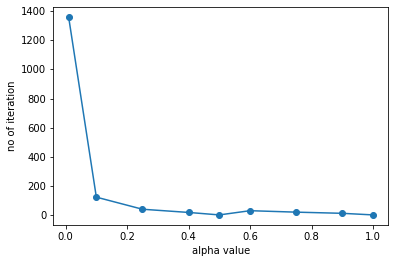

In [249]:
plt.plot(a,no_of_iteration)
plt.scatter(a,no_of_iteration)
plt.xlabel("alpha value")
plt.ylabel("no of iteration")

#5)Observation 
here we can see that the no. of iteration of is maximum when the alpha value near to zero. and the as we increses the value of alpha the no. of iteration is goes on decreasing. also the no. of iteration is decreasing fast between 0 to 0.1. at near to 0.5 to 0.6 iteration slighly increses after that it decreases.
for alpha value 0.5 and 1 the no. of iteration is equal to 1

6. [R] With starting point x0 = (25, 25) and τ = 10−10, we will now study the behavior of the backtracking line
search algorithm for different choices of ρ. Take α = 1, γ = 0.5. Try ρ ∈ {0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.
For each ρ, record the final minimizer, final objective function value and number of iterations taken by the
gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of
iterations is plotted against ρ values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the ρ values. Check and comment if for any ρ value,
gradient descent with backtracking line search takes lesser number of iterations when compared to the gradient
descent procedure with exact line search.

In [250]:
rho_values = [0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
final_minimizer = []
final_objective = []
no_of_iteration = []
for rho in rho_values:
  print("value of rho =",rho)
  x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, rho,0.5)
  my_tol = 1e-10
  my_start_x = np.array([25,25])
  final_minimizer.append(x_opt_bls)
  final_objective.append(evalf(x_opt_bls))
  no_of_iteration.append(k)
print("final minimizer",final_minimizer)
print("final 0bjective",final_objective)
print("no of iteration",no_of_iteration)

value of rho = 0.9
Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of rho = 0.75
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of rho = 0.6
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of rho = 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of rho = 0.4
Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
value of rho = 0.25
Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 

Text(0, 0.5, 'no of iteration')

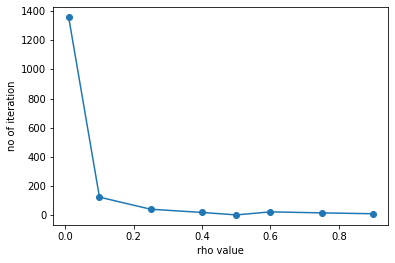

In [251]:
plt.plot(rho_values,no_of_iteration)
plt.scatter(rho_values,no_of_iteration)
plt.xlabel("rho value")
plt.ylabel("no of iteration")

#6)Observation 
here we can see that the no. of iteration of is maximum when the rho value near to zero. and the as we increses the value of rho the no. of iteration is goes on decreasing. also the no. of iteration is decreasing fast between 0 to 0.1 rho value. at near to 0.5 to 0.6 rho value iteration slighly increses after that it decreases.
for rho value 0.5 and 1 the no. of iteration is equal to 1